## Observations and Insights 

We have analyzed data from testing the effectiveness of 10 Drug Regimens (including a placebo) in reducing SCC tumor size in mice. 249 mice were in the study, the results of one mouse were discarded due to lack of reliability from duplication. Leaving data from 248 mice to be analzyed equally split between male and female. Some of our observations are:

Capomulin and Ramicane show lower values in their mean, median, and variance of tumor volume over the study period suggesting some effectiveness in reducing the tumor size compared to the other regimens and the placebo.

The superior performance of Capomulin and Ramicane are also evident in the boxplot as compared to two other regimens, Ceftamin and Infubinol.

A scatter plot and linear regresssion analysis indicate a negative correlation between mouse weight and tumor volume reduction under Capomulin. Meaning the reduction in tumor volume was greater the lesser the weight of the mouse, with there being little or no reduction in tumor volume for mice with weight near 24 grams.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

In [18]:
#### DONE - Checking the number of mice in the DataFrame.

num_mice_ID_df = pd.DataFrame({'Number of mice in study':[mouse_study_df['Mouse ID'].nunique()]})

#Table of number of mice in the study
num_mice_ID_df.style.hide_index()

Number of mice in study
249


In [19]:
#### DONE - Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Make a new field mouse_tp which combines Mouse_ID + Timepoint. This should be unique since the same mouse can only be observed once at a particular timepoint. If not unique, something is wrong with mouse's data so remove all records for that mouse.
mouse_study_df['mouse_tp'] = mouse_study_df['Mouse ID'] + mouse_study_df['Timepoint'].astype(str)

#Creates table of True (is a duplicate mouse_tp ID) or False (is not a duplicate mouse_tp ID)
duplicate_mouse_tp = pd.DataFrame(mouse_study_df['mouse_tp'].value_counts()>1)

#Change column name to be descriptive of what True/False indicates in this column
duplicate_mouse_tp.rename(columns = {'mouse_tp':'duplicate_mouse'}, inplace = True)

#Extract the Mouse ID from the mouse_tp and set the index to Mouse ID
duplicate_mouse_tp['Mouse ID']= duplicate_mouse_tp.index.str[:4]
duplicate_mouse_tp.set_index('Mouse ID', inplace=True)

#Remove all the rows with duplicate ID. Result is a table of unique Mouse ID's and whether each ID is duplicated and needs to be removed (TRUE) or not duplicated and shoudl be kept (FALSE)
index = duplicate_mouse_tp.index
is_duplicate = index.duplicated(keep="first")
not_duplicate = ~is_duplicate
dup_mouse_truth = duplicate_mouse_tp[not_duplicate]

#Show duplicate Mouse ID's which should be removed
dup_IDs = dup_mouse_truth.loc[dup_mouse_truth['duplicate_mouse']]

#Table showing the duplicate Mouse IDs
dup_IDs

,duplicate_mouse
Mouse ID,
g989,True


In [20]:
#### DONE - Optional: Get all the data for the duplicate mouse ID. 

#Add duplicate column (TRUE) to full mouse study database
mouse_study_dup_flag_df = pd.merge(mouse_study_df, dup_mouse_truth, on='Mouse ID')

#Show records for duplicate Mouse ID's
dup_mice_df = mouse_study_dup_flag_df.loc[mouse_study_dup_flag_df['duplicate_mouse']]

#The study records associated with the duplicate mouse ID which should be removed from the analysis
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),mouse_tp,duplicate_mouse
860,g989,0,45.000000,0,Propriva,Female,21,26,g9890,True
861,g989,0,45.000000,0,Propriva,Female,21,26,g9890,True
862,g989,5,48.786801,0,Propriva,Female,21,26,g9895,True
863,g989,5,47.570392,0,Propriva,Female,21,26,g9895,True
864,g989,10,51.745156,0,Propriva,Female,21,26,g98910,True
865,g989,10,49.880528,0,Propriva,Female,21,26,g98910,True
866,g989,15,51.325852,1,Propriva,Female,21,26,g98915,True
867,g989,15,53.442020,0,Propriva,Female,21,26,g98915,True
868,g989,20,55.326122,1,Propriva,Female,21,26,g98920,True
869,g989,20,54.657650,1,Propriva,Female,21,26,g98920,True


In [21]:
#### DONE - Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Make new mouse study df with duplicate mouse ID's removed. Clean up by deleting the working columns added during these steps.
no_dups_mouse_study_df = mouse_study_dup_flag_df.loc[mouse_study_dup_flag_df['duplicate_mouse']==False]

del no_dups_mouse_study_df['mouse_tp']
del no_dups_mouse_study_df['duplicate_mouse']

#The final working table from the study with all the mouse and study data and with duplicates eliminated.
no_dups_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [22]:
#### DONE - Checking the number of mice in the clean DataFrame.

no_dup_num_mice_ID = pd.DataFrame({'Number mice after removing duplicates':[no_dups_mouse_study_df['Mouse ID'].nunique()]})

#A table showing the number of mice in the study after eliminating the duplicate Mouse IDs
no_dup_num_mice_ID.style.hide_index()

Number mice after removing duplicates
248


## Summary Statistics

In [23]:
#### DONE - Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#### This method is the most straighforward, creating multiple series and putting them all together at the end.
#List of drug regimens
drug_regimens = no_dups_mouse_study_df['Drug Regimen'].unique()

#For each drug regimen calculate mean and make list of means
drug_reg_means = [no_dups_mouse_study_df.loc[no_dups_mouse_study_df['Drug Regimen']==x, 'Tumor Volume (mm3)'].mean() for x in drug_regimens]

#For each drug regimen calculate median and make list of medians
drug_reg_medians = [no_dups_mouse_study_df.loc[no_dups_mouse_study_df['Drug Regimen']==x, 'Tumor Volume (mm3)'].median() for x in drug_regimens]

#For each drug regimen calculate variance and make list of variances
drug_reg_vars = [no_dups_mouse_study_df.loc[no_dups_mouse_study_df['Drug Regimen']==x, 'Tumor Volume (mm3)'].var() for x in drug_regimens]

#For each drug regimen calculate standard deviation and make list of standard deviations
drug_reg_stds = [no_dups_mouse_study_df.loc[no_dups_mouse_study_df['Drug Regimen']==x, 'Tumor Volume (mm3)'].std() for x in drug_regimens]

#For each drug regimen calculate standard erro and make list of standard errors
drug_reg_sems = [no_dups_mouse_study_df.loc[no_dups_mouse_study_df['Drug Regimen']==x, 'Tumor Volume (mm3)'].sem() for x in drug_regimens]

#Create final summary stats table by zipping all the lists and naming the columns. Set Drug Regimen as index
drug_reg_summary_stats = pd.DataFrame(list(zip(drug_regimens, drug_reg_means, drug_reg_medians, drug_reg_vars, drug_reg_stds, drug_reg_sems)), columns= ['Drug Regimen', 'Tumor Volume mean', 'Tumor Volume median', 'Tumor Volume variance', 'Tumor Volume std dev', 'Tumor Volume SEM'])
drug_reg_summary_stats.set_index('Drug Regimen', inplace=True)

#Table of summary tumor volume statistics for each Drug Regimen
drug_reg_summary_stats

,Tumor Volume mean,Tumor Volume median,Tumor Volume variance,Tumor Volume std dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331


## Bar Plots

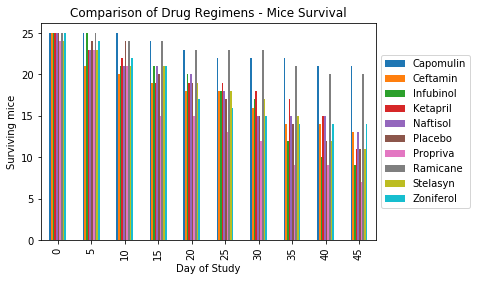

In [24]:
#### DONE - Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

#Plot a bar chart using Pandas plot.bar method. Group by Timepoints and then count the Drug Regimen occurences which indicates a live mouse under that Drug Regimen. Unstack creates a pivot table type structure.
no_dups_mouse_study_df.groupby('Timepoint')['Drug Regimen'].value_counts().unstack().plot(kind='bar')

#Set labels, titles, legend
plt.ylabel('Surviving mice')
plt.xlabel('Day of Study')
plt.title('Comparison of Drug Regimens - Mice Survival')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Bar plot of surviving mouse at each timepoint for each drug regimen (Using Pandas .plot)
plt.show()

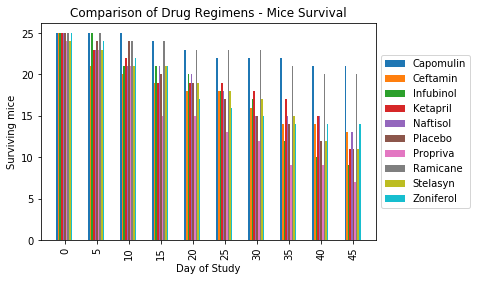

In [25]:
#### DONE - Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Group by Timepoints and then count the Drug Regimen occurences which indicates a live mouse under that Drug Regimen. Unstack creates a pivot table type structure.
mouse_plot = no_dups_mouse_study_df.groupby('Timepoint')['Drug Regimen'].value_counts().unstack()

#Capture the number of Drug Regimens for the plot looping
num_DR = np.arange(len(mouse_plot.columns))

#set x axis labels, location, and legend values
xtick_labels = mouse_plot.index
xtick_loc = num_DR
legend_values = mouse_plot.columns

# set width of a bar in the bar chart
barWidth = 0.05

#Plot bar chart using pyplot.bar method. Shift the bar by barwidth to make Drug Regimen groupings visually
for i in num_DR:
     plt.bar((num_DR-len(num_DR)*barWidth/2)+barWidth*i, mouse_plot.iloc[:,i], width=barWidth)

#Set labels, title, legend
plt.xticks(xtick_loc, xtick_labels, rotation=90)
plt.ylabel('Surviving mice')
plt.xlabel('Day of Study')
plt.title('Comparison of Drug Regimens - Mice Survival')
plt.legend(legend_values,loc='center left', bbox_to_anchor=(1, 0.5))

#Bar plot of surviving mouse at each timepoint for each drug regimen (Using Matplotlib pyplot)
plt.show()

## Pie Plots

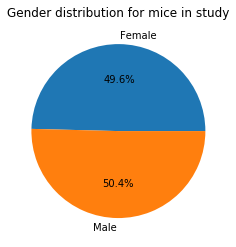

In [26]:
#### DONE - Generate a pie plot showing the distribution of female versus male mice using pandas

#Get mice from original mouse database, discard the duplicate mice
mouse_gender_df = mouse_metadata.loc[~mouse_metadata['Mouse ID'].isin(dup_IDs.index)]

#Group by gender and get count
mouse_gender_df_grp = mouse_gender_df.groupby('Sex')
gender_count = mouse_gender_df_grp['Mouse ID'].count()

# #Plot pie chart using Pandas .plot functionality
gender_count.plot(kind='pie', y='Sex', legend='', autopct='%1.1f%%', title='Gender distribution for mice in study')
plt.ylabel('')

#Pie chart of mice gender distibution (Using Pandas .plot)
plt.show()

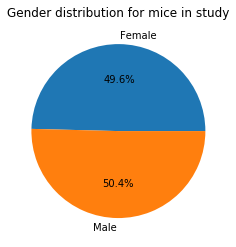

In [27]:
#### DONE - Generate a pie plot showing the distribution of female versus male mice using pyplot


#Pie plot of gender using pyplot
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Gender distribution for mice in study')

#Pie chart of mice gender distibution (Using Matplotlib pyplot)
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
#### DONE - Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.  

#Group mice ID and sort descending by timepoint within Mouse ID. Grab first row for each ID. This gives a df with one row for each mouse that contains the final timepoint and tumor volume
Last_tp_by_Mouse_ID = pd.DataFrame(no_dups_mouse_study_df.sort_values(['Mouse ID','Timepoint'],ascending=False).groupby('Mouse ID').first())

#Group by Drug Regimen. Use describe to get stats and save as df
Final_tp_by_DR = Last_tp_by_Mouse_ID.groupby('Drug Regimen')
Final_TV_size_stats = pd.DataFrame(Final_tp_by_DR['Tumor Volume (mm3)'].describe())

#Calculate IQR, upper and lower bound for outlier identifcation, identify outliers
Final_TV_size_stats['IQR']= Final_TV_size_stats['75%']-Final_TV_size_stats['25%']
Final_TV_size_stats['Outlier_Upper']= Final_TV_size_stats['75%']+Final_TV_size_stats['IQR']*1.5
Final_TV_size_stats['Outlier_Lower']= Final_TV_size_stats['25%']-Final_TV_size_stats['IQR']*1.5

#Flag Outlier as TRUE if min or max are outside the the IQR lower or upper limits
Final_TV_size_stats['Outlier'] = (Final_TV_size_stats['min']<Final_TV_size_stats['Outlier_Lower']) | (Final_TV_size_stats['max']>Final_TV_size_stats['Outlier_Upper'])

#Table of statistics for the final Tumor Volume for each regiment. To identify the top 4 regimens and outliers
Final_TV_size_stats

,count,mean,std,min,25%,50%,75%,max,IQR,Outlier_Upper,Outlier_Lower,Outlier
Drug Regimen,,,,,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963,7.781863,51.832015,20.704562,False
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185,15.577752,87.666458,25.355450,False
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731,11.477135,82.741446,36.832905,True
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014,13.152155,89.600484,36.991862,False
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817,17.484111,95.789787,25.853344,False
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939,15.191386,90.921368,30.155822,False
Propriva,24.0,56.493884,8.415626,45.000000,49.119739,55.591622,62.689368,72.455421,13.569629,83.043811,28.765296,False
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869,9.098537,54.306811,17.912664,False
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690,16.627349,94.044968,27.535572,False


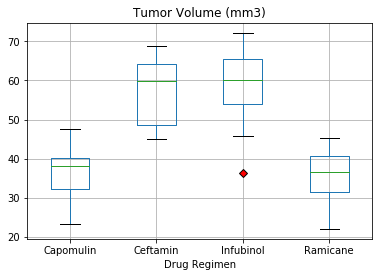

In [29]:
#### DONE - Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin, Ramicane, Infubinol, and Ceftamin
#Note the instructions say to evaluate the above regimens as the most promising. Based on the statistics I don't see Ceftamin as promising since the tumor did not shrink at all from the starting value of 45 mm3. Propriva has a sligtly smaller average tumor size, but also is not effective. 

#List of the top 4 treatments
Top4_DR =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Change the marker and color of any outliers
red_diamond = dict(markerfacecolor='r', marker='D')

#Make a table of the Tumor Volume at the last timepoint for each mouse that's in the top 4 Drug Regimens
Final_TV_for_top4_DR =Last_tp_by_Mouse_ID.loc[Last_tp_by_Mouse_ID['Drug Regimen'].isin(Top4_DR)]

#Create a boxplot for the final Tumor Volumes under the top 4 DR's. Outlier is a red diamond
Final_TV_for_top4_DR.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)', flierprops=red_diamond)
plt.suptitle('')

#A boxplot of final tumor volume distribution for each of the top 4 drug regimens. Outliers as red diamonds
plt.show()

## Line and Scatter Plots

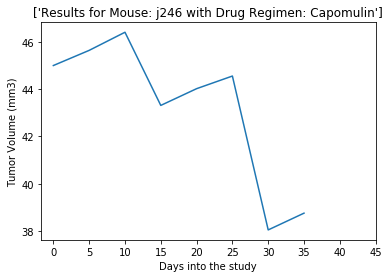

In [30]:
#### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Start with the clean no duplictes mouse df.
mouse_metadata_no_dups = mouse_metadata.loc[mouse_metadata['Mouse ID'].isin(no_dups_mouse_study_df['Mouse ID'])]

#Input for which Drug Regimen to plot
which_regimen_plot = 'Capomulin'

#Create a list of all the mice IDs that were in the target Drug Regimen
regimen_mouse_IDs = pd.Series(mouse_metadata_no_dups['Mouse ID'].loc[mouse_metadata_no_dups['Drug Regimen']==which_regimen_plot])

#Generate a random list of ID's to be plotted
how_many_mice_plot = 1
IDs_to_plot = np.random.choice(regimen_mouse_IDs, how_many_mice_plot)

#Select just the mice in the desired Drug Regimen
plot_mice = no_dups_mouse_study_df.loc[no_dups_mouse_study_df['Drug Regimen']==which_regimen_plot]
#Select just the ID, Timepoint, and Tumor Volume columns that will be needed to do the plot
plot_mice = plot_mice[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
#Select just the mice with the random ID generated
plot_mice = plot_mice.loc[plot_mice['Mouse ID'].isin(IDs_to_plot)]

#For the selected mouse at each timepoint plot the tumor volume. 
plt.plot(plot_mice['Timepoint'], plot_mice['Tumor Volume (mm3)'])
plt.xticks(np.arange(0,50,5))
plt.xlabel('Days into the study')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Results for Mouse: '+IDs_to_plot+' with Drug Regimen: '+which_regimen_plot)

#A line plot of the progression in tumor size for a single mouse over the course of the study (Using pyplot)
plt.show()

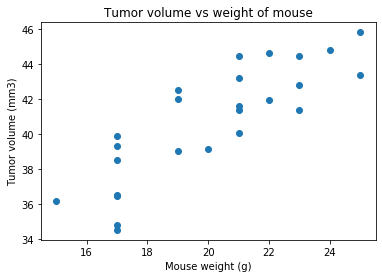

In [31]:
#### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plot_mice = no_dups_mouse_study_df.loc[no_dups_mouse_study_df['Drug Regimen']==which_regimen_plot]
scatter_plot_mice = scatter_plot_mice.groupby('Mouse ID')

plt.scatter(scatter_plot_mice['Weight (g)'].mean(), scatter_plot_mice['Tumor Volume (mm3)'].mean())
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor volume vs weight of mouse')

#A scatter plot of the average tumor volume over the course of the study vs weight
plt.show()

## Correlation and Regression

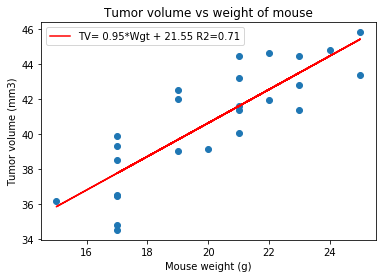

In [32]:
#### Calculate the correlation coefficient and linear regression model 
#### for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, r_value, p_value, std_err = st.linregress(scatter_plot_mice['Weight (g)'].mean(), scatter_plot_mice['Tumor Volume (mm3)'].mean())
r_squared = r_value**2

plt.scatter(scatter_plot_mice['Weight (g)'].mean(), scatter_plot_mice['Tumor Volume (mm3)'].mean())
plt.plot(scatter_plot_mice['Weight (g)'].mean(), scatter_plot_mice['Weight (g)'].mean()*slope+intercept, color='red', label= 'TV= '+str(round(slope,2))+'*Wgt + '+str(round(intercept,2))+' R2='+str(round(r_squared,2))) 
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor volume vs weight of mouse')
plt.legend()

#A scatter plot of the average tumor volume over the course of the study vs weight
#Overlaid with a linear regression fit. Showing the linear regression formula and R-squared in the legend
plt.show()